In [26]:
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
%run kmeans

## 1. Introduction to clustering
</p>As the name suggests clustering is a way to cluster similar data points together. It is part of unsupervised machine learning problems where the data is unlabelled and uncategorized.</p> 
</p>By formal definition, clustering is a class of unsupervised algorithms used in machine learning to find patterns or natural groupings in data. It has a wide range of applications including but not limited to certain types of recommendation engines, image compression, market segmentation, document clustering etc. 
In this project, I will explore kmeans as a way to generate features for supervised machine learning algorithms as well as its application in image compression.</p>

## 2. K-Means Algorithm 
</p>The algorithm works by first selecting k unique points as the name suggests. </p>

1. Pick k unique points. This is the number of clusters we want to categorize or group our data into. There are several ways such as the Elbow method, Silhouette method to determine this hyperparameter.
2. Initialize the k clusters based on random data points from the sample. 
3. Compute distances of each point from the cluster centroid initialized in the first step.
4. Assign labels to each point based on minimum distance from the clusters
5. Compute mean of each cluster.
6. Reassign cluster centroid to the mean and recompute steps 3,4 and 5 till the clusters converge based on some predecided tolerance value.

### 2.1 Limitations of K-Means based on random initialization

1. Highly unstable performance for some use-cases due to the effect of random initialization.
2. Clusters converge to different values based on the initial cluster centroid location chosen.

### 2.2. K-Means++ Algorithm
</p> The main motivation here is to improve the stability of the kmeans centroid initialization and address the limitations of random initialization.</p>

</p> The main steps involved are as follows:</p>

1. Pick the initial point randomly
2. Compute distance from all existing clusters
3. Pick the next point based on the maximum of minimum distance from each cluster.
4. Repeat the process until all the k clusters is initialized.

</p> The k means++ algorithm improves the prediction performance and stability since the randomness of the initial points is addressed by the way of computing the next k-1 points which maximize the distance from points previously picked by the algorithm </p>

### 2.3. Elbow method to choose k
</p>The parameter k is quite important to determine since the incorrect value will result in groupings that might not be useful. Hence we will try to determine its value using some synthetic data that has about 4 clusters. The data distribution is as follows</p> 

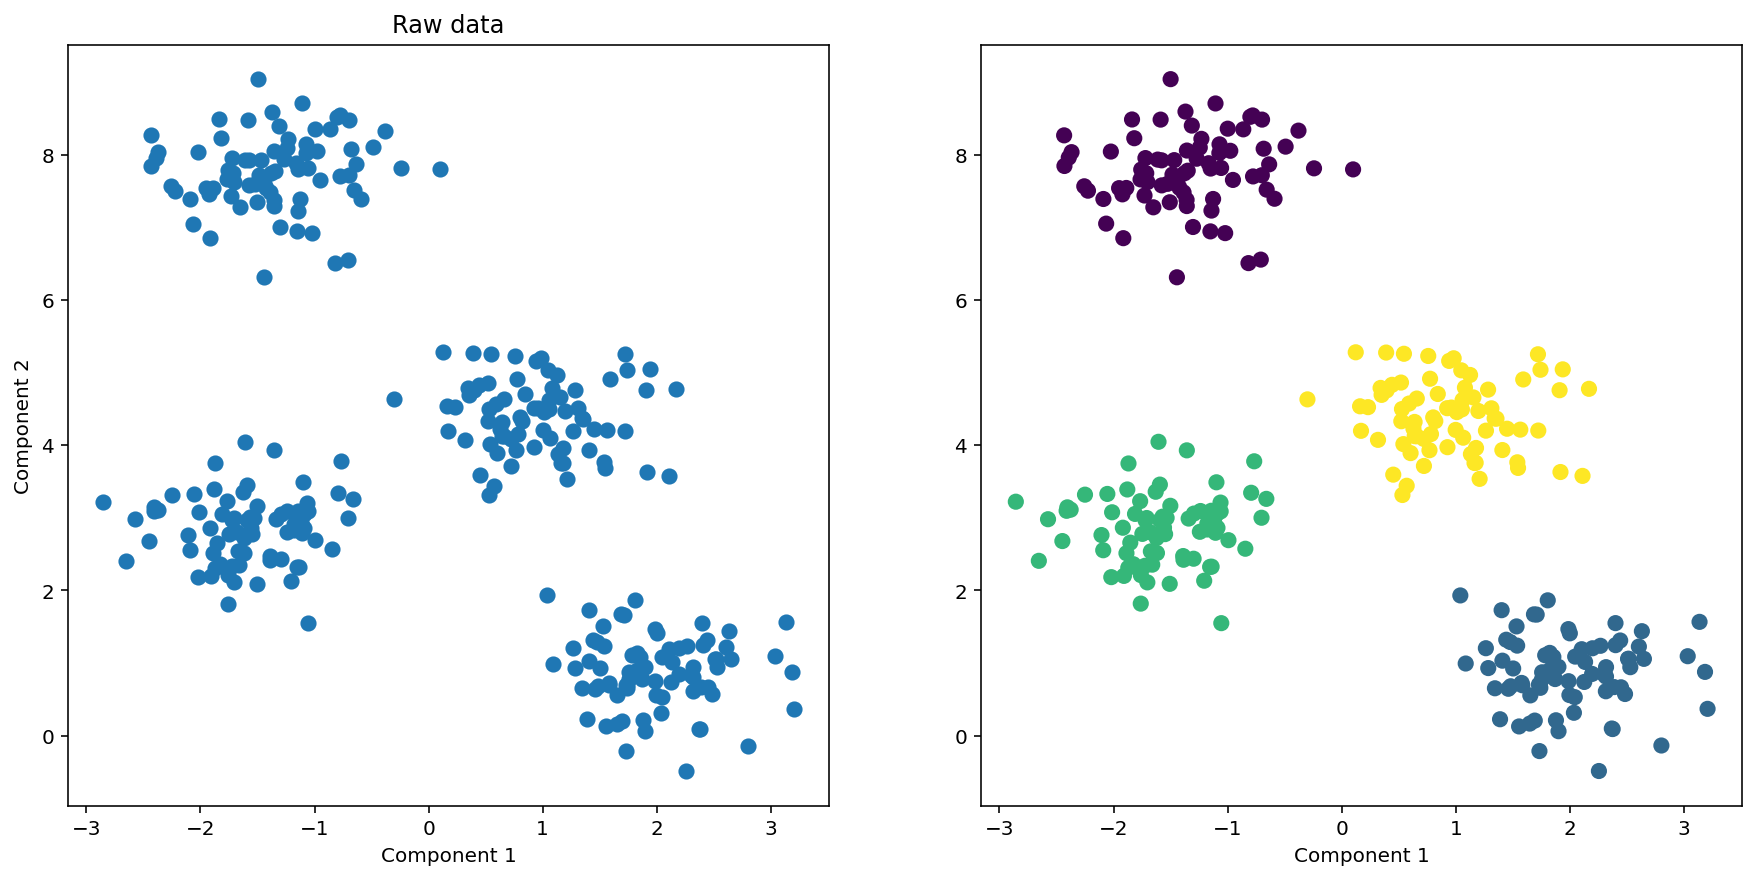

In [3]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.5, random_state=0)
centroids, label = kmeans(X, k=4, centroids='kmeans++', tolerance=0.01)
plt.subplots(2,2,figsize=(15,7))
plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:,1],s=50)
plt.title('Raw data')
plt.ylabel('Component 2')
plt.xlabel('Component 1')
plt.subplot(1, 2, 2)
plt.scatter(X[:,0], X[:,1],s=50,c=label,label=label)
plt.xlabel('Component 1')
plt.show()

</br></br></br></br>
</p>The elbow method plots the number of clusters with the within-cluster sum of square(WCSS) distance. As seen from the figure below on the left we can see the elbow where the curve changes the slope and becomes constant or flat. The value at which this happens is our optimal k value.</p> 
</br>

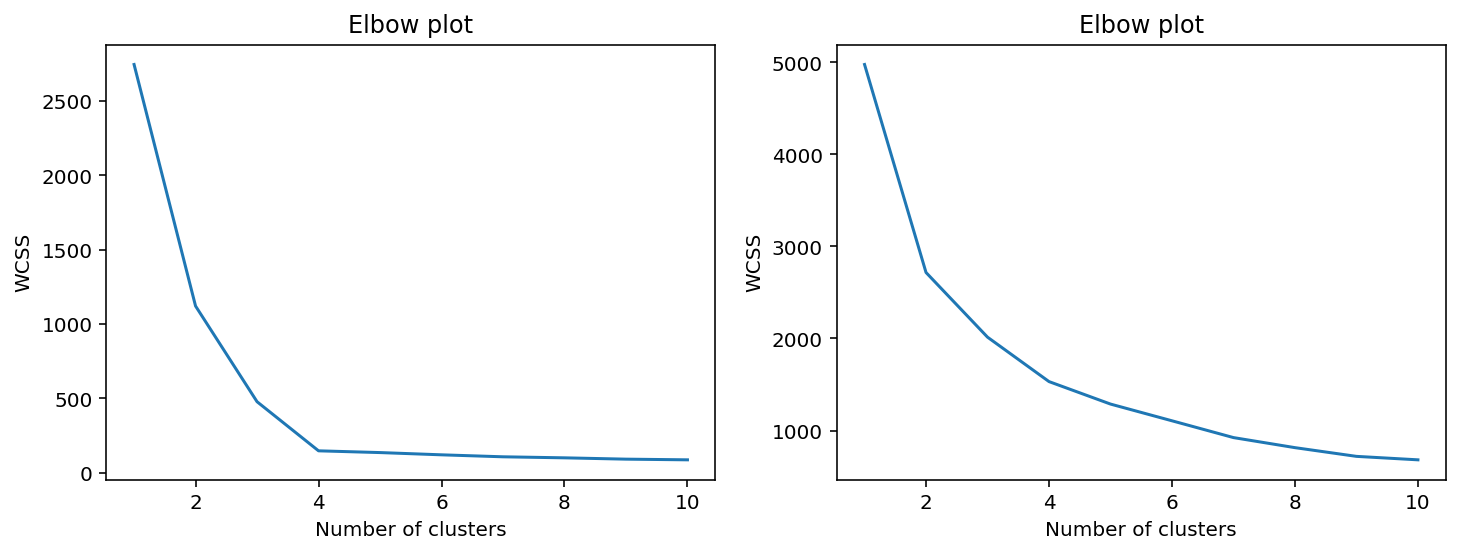

In [14]:
plt.subplots(1,2,figsize=(12,4))
plt.subplot(1, 2, 1)
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.5, random_state=0)
plt = ElbowPlot(X,title='Elbow plot')
plt.grid(False)
plt.subplot(1, 2, 2)
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=2, random_state=0)
plt = ElbowPlot(X)
plt.grid(False)
plt.show()

</p> Clearly, there is an elbow observed at k = 4 for the curve on the left since the curve almost becomes flat and changes the behavior at this point. This is one of the simplest methods to determine the optimal number of clusters. However it is not always clear which point is the elbow as seen above from the plot on the right. This happens because the separation in the clusters is not clear.
</p>
</br>

## 3. Application of K-Means for classification

</p>Despite kmeans being an unsupervised problem it can still be used for classification problems. Here I will be using scikit-learns inbuilt breast cancer dataset to classify healthy patients from patients having cancer. Despite being an unsupervised algorithm it performs decently giving an accuracy score of 91.2%.</p>

In [13]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

sc = StandardScaler()
X = sc.fit_transform(X)
centroids, labels = kmeans(X, k=2, centroids='kmeans++', tolerance=0.01)
cf_mat = confusion_matrix(y,labels)
print(f'Accuracy score: {round(accuracy_score(1-labels, y)*100,1)}%')

Accuracy score: 91.2%


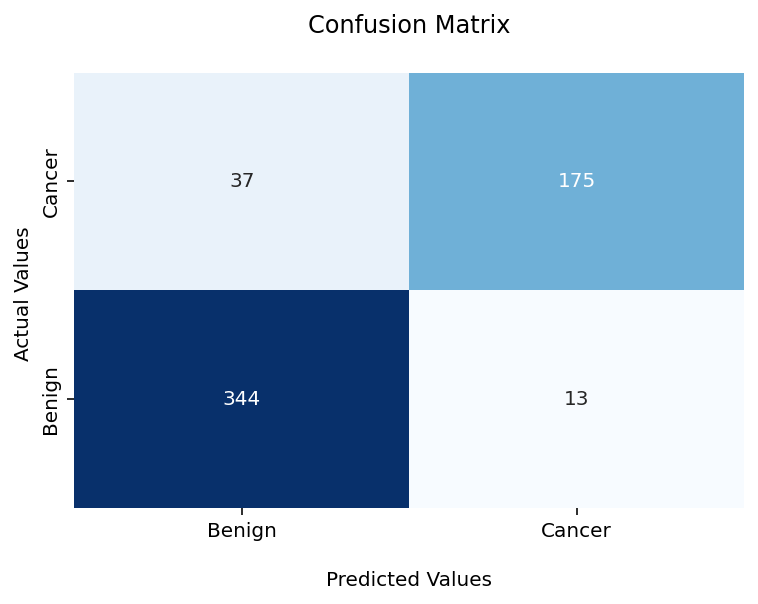

In [10]:
ax = sns.heatmap(cf_mat, annot=True, cmap='Blues',fmt="d",cbar=False)
ax.set_title('Confusion Matrix\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['Benign','Cancer'])
ax.yaxis.set_ticklabels(['Cancer','Benign'])
plt.show()


## 4. Application of K-Means for grouping and finding patterns/associations

</p>One of the use-cases of kmeans revolves around finding associations and patterns in the data by grouping certain features.
I will be using the California housing prices data here which contains information regarding latitude, longitude, household income etc. I will try to find patterns between location data and average household price based on clusters created using location and median household income. Based on the plots below it is clear that a relationship exists between location(latitude and longitude) and median household income/median house price </p>

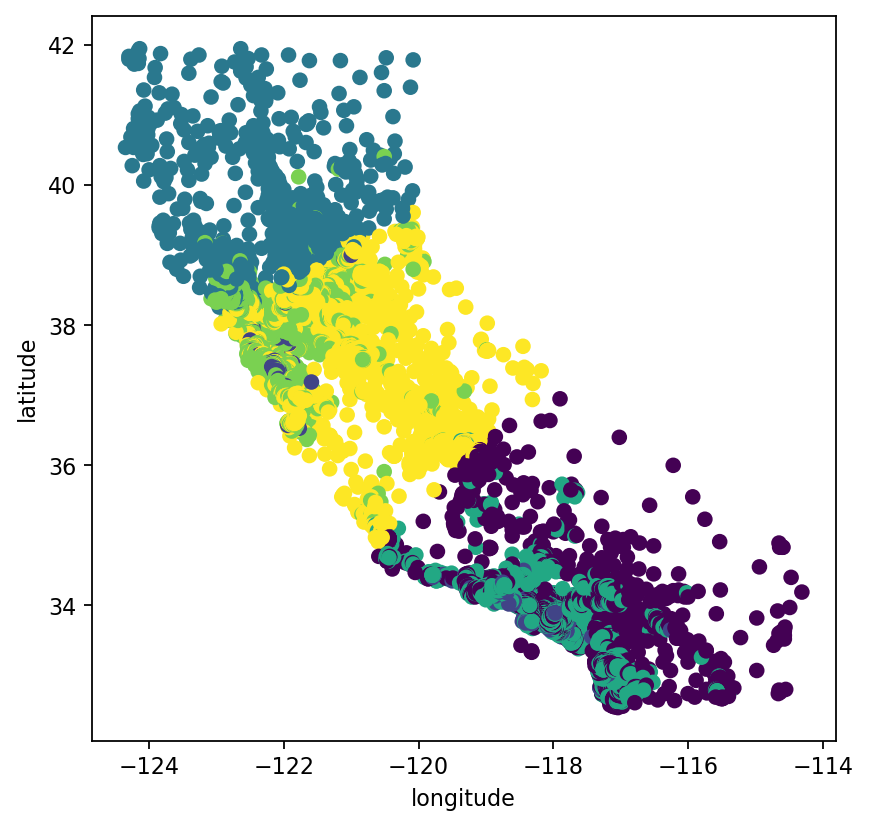

In [34]:
df = pd.read_csv('data/housing.csv')
X = df[['longitude','latitude','median_income']].to_numpy()
centroids, labels = kmeans(X, 6, centroids='kmeans++')

plt.figure(figsize=(6, 6), dpi=80)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

[Text(0.5, 0, 'cluster'), Text(0, 0.5, 'Median house value (in k$)')]

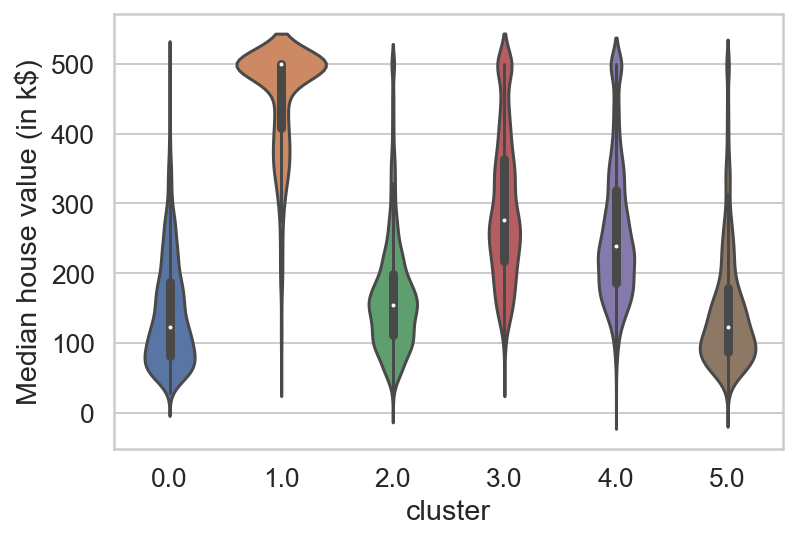

In [8]:
df_cluster = pd.DataFrame(np.append(X,labels.reshape(-1,1),axis=1),columns=['longitude','latitude','median_income','cluster'])
df_cluster['median_house_value'] = df['median_house_value']/1000
sns.set(style="whitegrid", font_scale=1.2)
p = sns.violinplot(x="cluster", y="median_house_value", data=df_cluster)
p.set(xlabel = 'cluster', ylabel='Median house value (in k$)')


Here from the above plot, it is clear that the median house value can be clustered based on income and location as we see pockets of very high median house value in clusters 1, 3 and 4 whereas clusters 0, 2 and 5 clusters have very low median house value. This gives us the underlying relation between location and median house value.

## 5. Application of K-Means to Image compression

</p>One of the applications of kmeans is in image compression. Each pixel in an image takes a value from 0 to 255 and is of size 3 bytes (RGB). So we have about 16 million colors possible (256*256*256). However human eye cannot perceive these many colors. Hence reducing the number of colors in an image to only a handful will suffice in most cases. I will show examples below where I will reduce the colors to only 32 and produces an almost identical image.</p>
</p>Below are my calico cats taking an afternoon nap retaining all their glorious colors even when we reduce the number of colors to 32: </p>

In [9]:
img = Image.open('data/cats.jpg')
X = np.array(img).reshape(-1,3)
h,w, _ =np.array(img).shape
k=32
centroids, labels = kmeans(X, k=k, centroids='kmeans++', max_iter=30)
centroids = centroids.astype(np.uint8)
X = centroids[labels] 
img_ = Image.fromarray(X.reshape((h,w,3)))
img_.save('data/cats_comp.jpg')

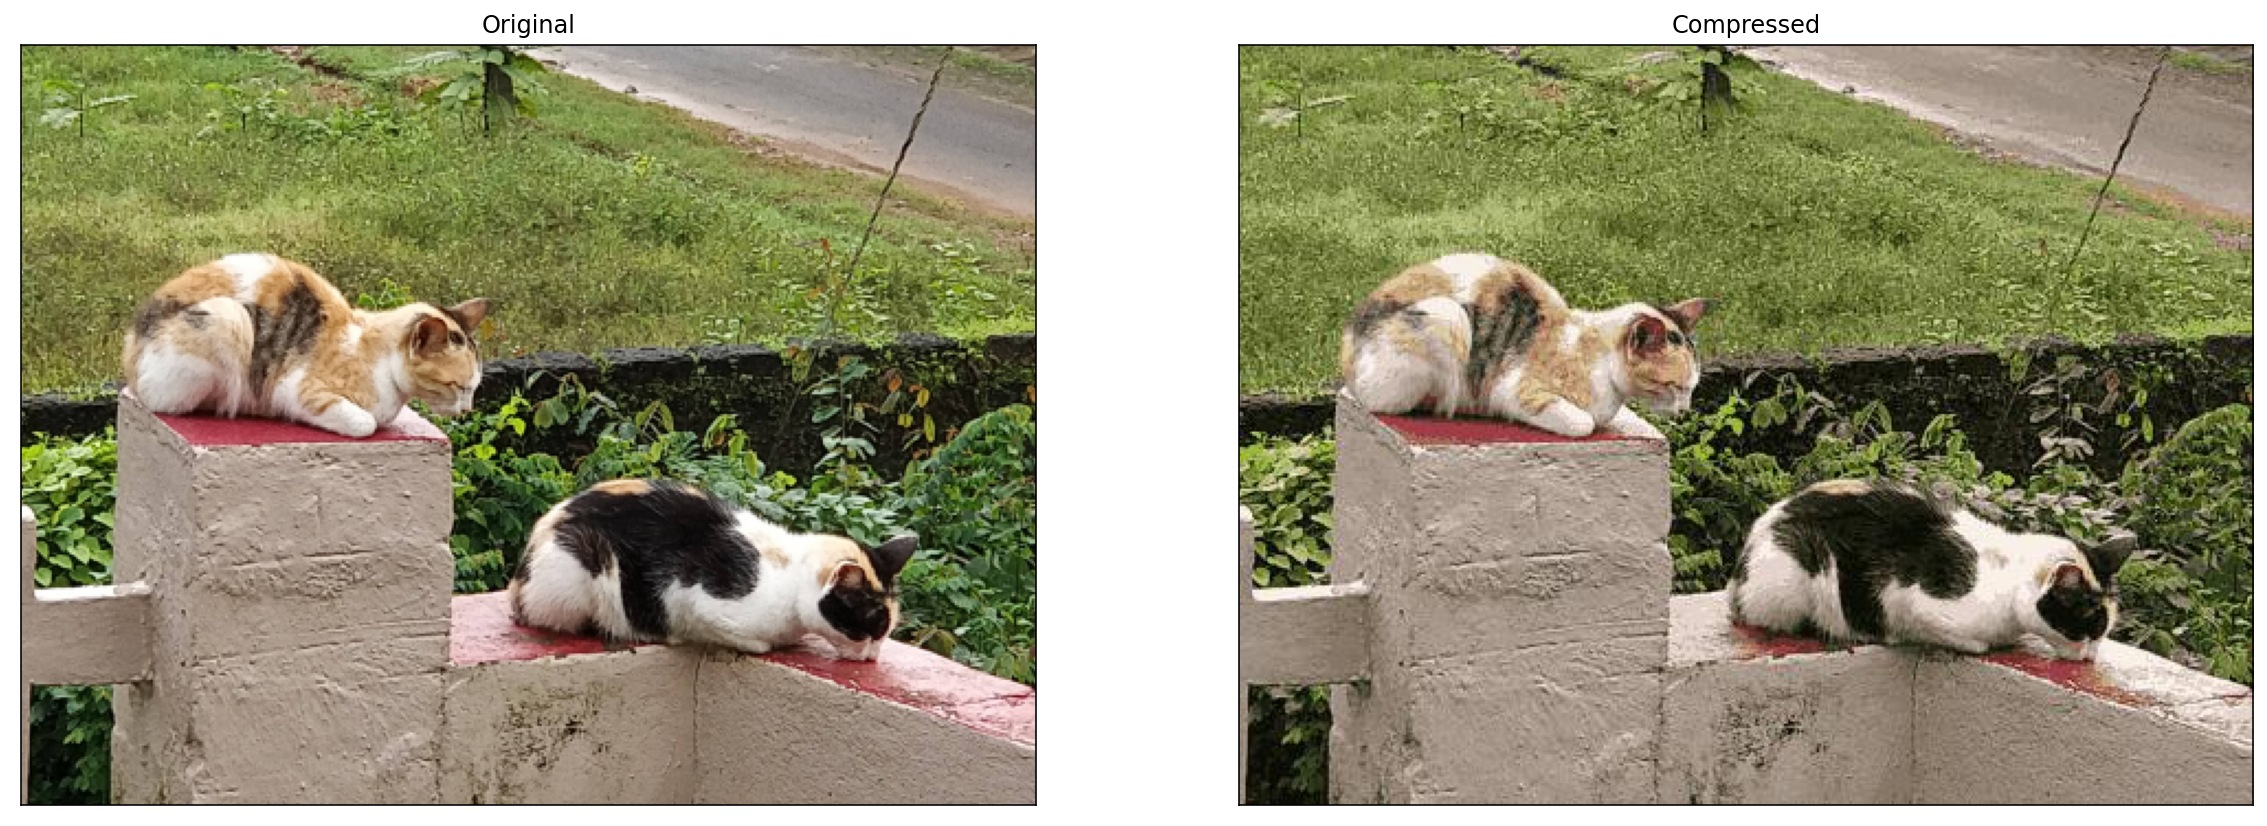

In [11]:
rcParams['figure.figsize'] = 20 ,10
img_A = mpimg.imread('data/cats.jpg')
img_B = mpimg.imread('data/cats_comp.jpg')
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_A);
ax[0].grid(False)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title('Original')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title('Compressed')
ax[1].imshow(img_B);
ax[1].grid(False)


Applying image compression to black and white image of famous San-Francisco bridge (Credits: https://www.pinterest.com/pin/67694800618575464/) we get following result:

In [29]:
img = Image.open('data/san_francisco.jpeg')
X = np.array(img).reshape(-1,1)
h,w = np.array(img).shape
k=32
centroids, labels = kmeans(X, k=k, centroids='kmeans++', max_iter=30)
centroids = centroids.astype(np.uint8)
X = centroids[labels] 
img_ = Image.fromarray(X.reshape(h,w), 'L')
img_.save('data/san_francisco_comp.jpeg')

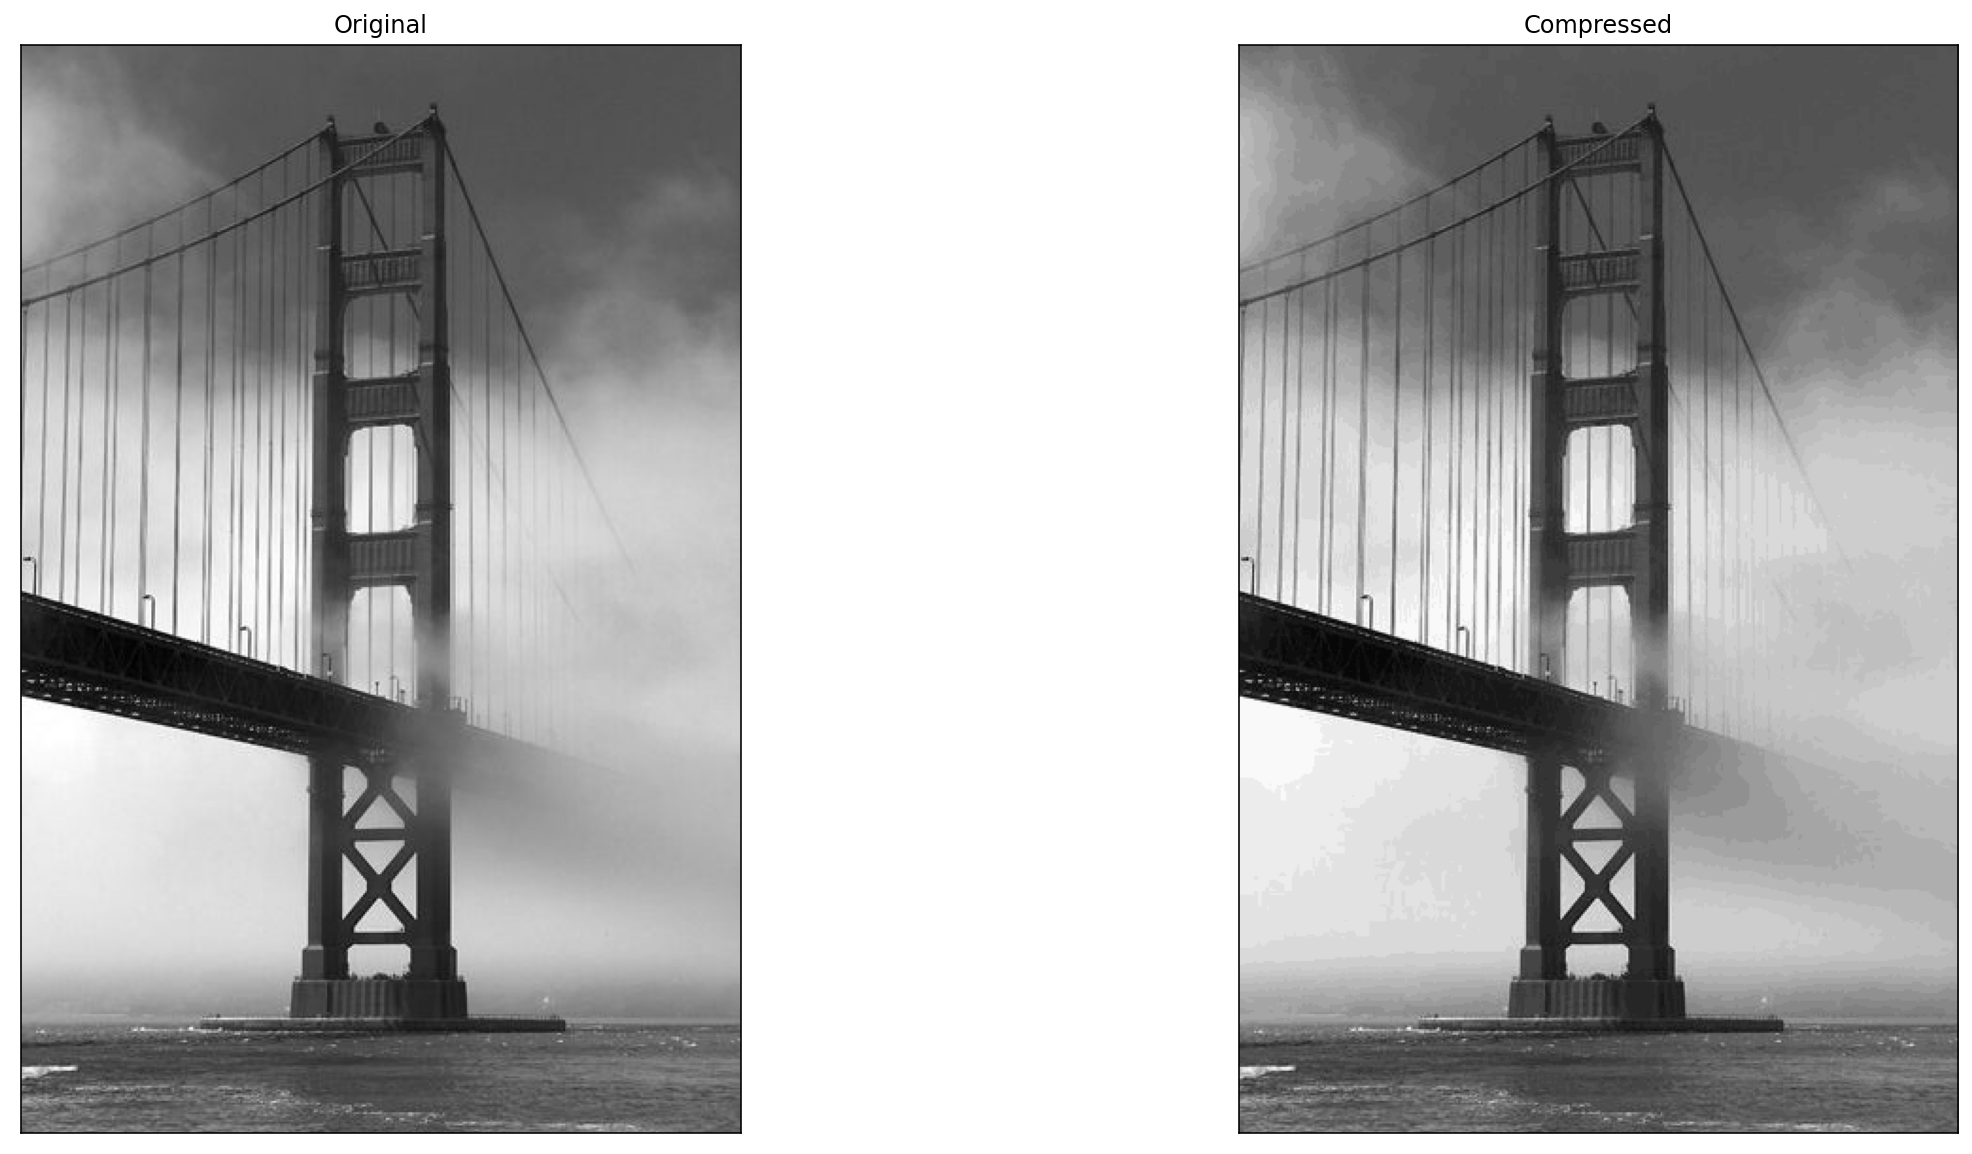

In [31]:
rcParams['figure.figsize'] = 20 ,10
img_A = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB)
img_B = cv2.cvtColor(X.reshape(h,w), cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_A);
ax[0].grid(False)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title('Original')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title('Compressed')
ax[1].imshow(img_B);
ax[1].grid(False)

In [11]:
img = Image.open('data/ocean_beach.jpg')
X = np.array(img).reshape(-1,3)
h,w, _ =np.array(img).shape
k=32
centroids, labels = kmeans(X, k=k, centroids='kmeans++', max_iter=30)
centroids = centroids.astype(np.uint8)
X = centroids[labels] 
img_ = Image.fromarray(X.reshape((h,w,3)))
img_.save('data/ocean_beach_comp.jpg')

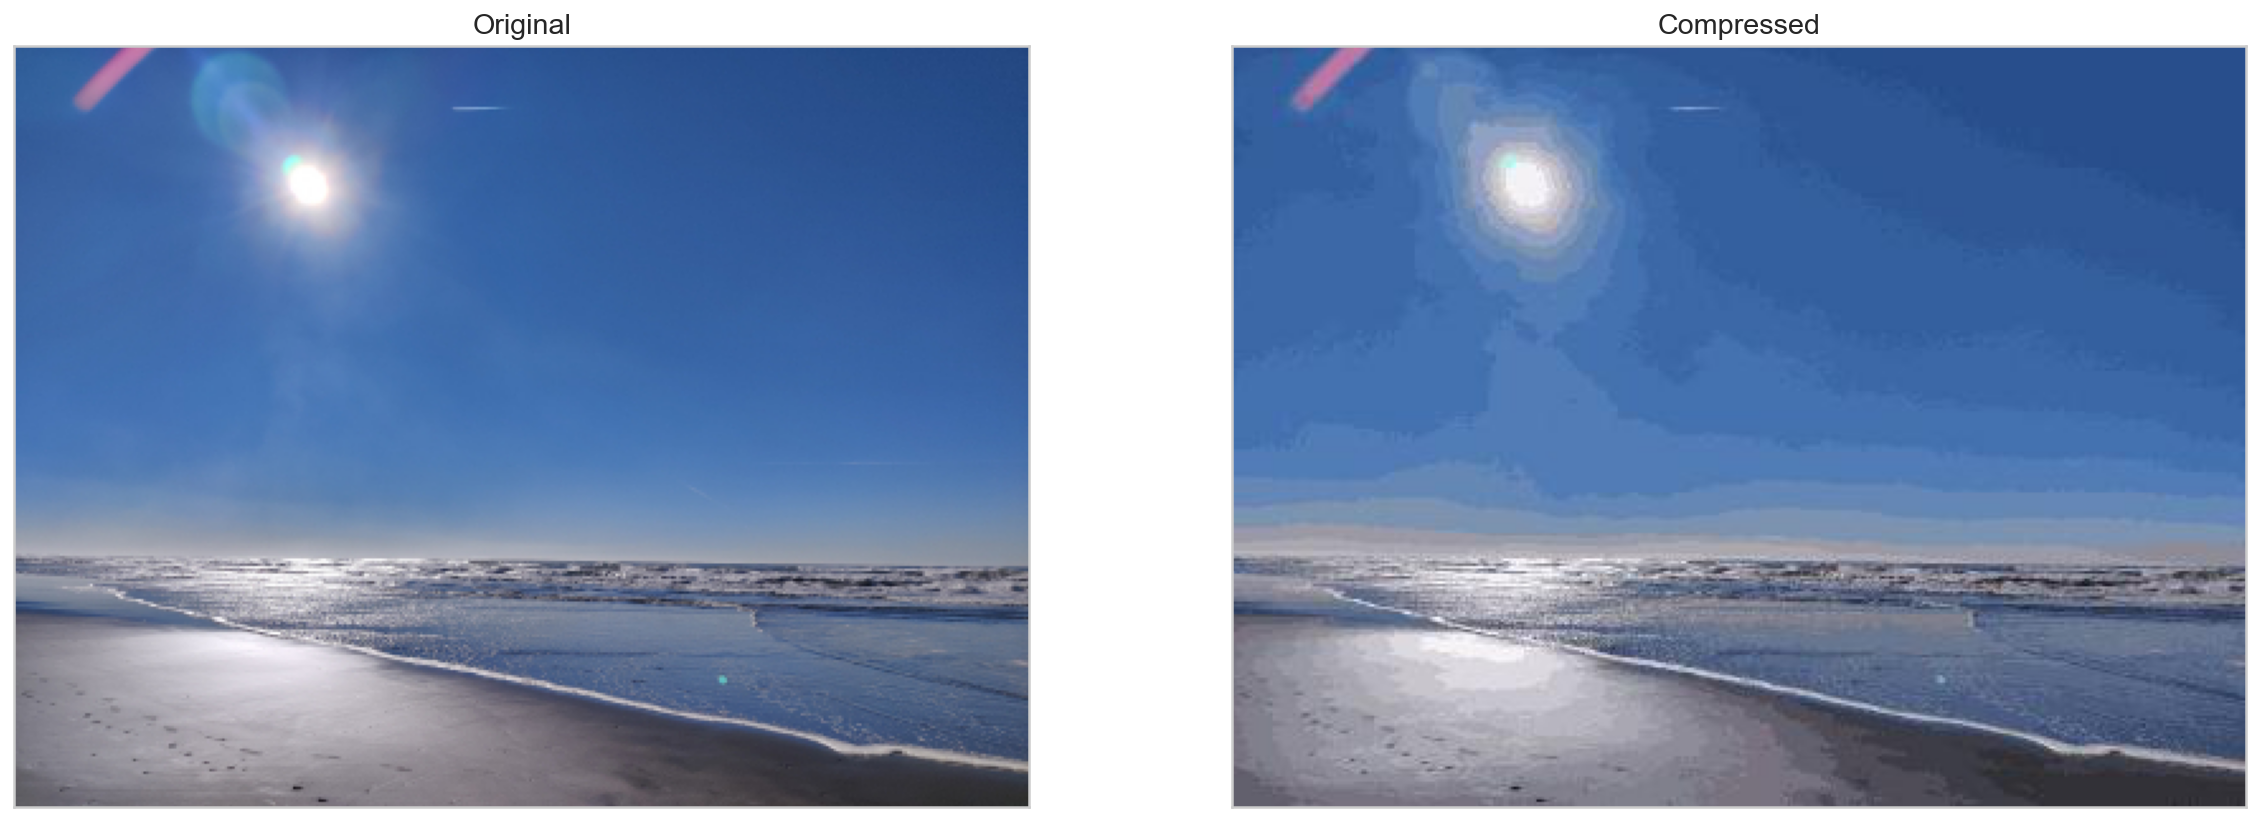

In [12]:
rcParams['figure.figsize'] = 20 ,10
img_A = mpimg.imread('data/ocean_beach.jpg')
img_B = mpimg.imread('data/ocean_beach_comp.jpg')
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_A);
ax[0].grid(False)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title('Original')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title('Compressed')
ax[1].imshow(img_B);
ax[1].grid(False)

Compression using kmeans is not perfect as we can see that the above image of San Francisco's ocean beach as it suffers due to the lack of colors in the high contrast regions of the image on the right. This can be fixed by better initialization techniques and choosing(tuning) the appropriate number of colors for the image. 

## 6. Spectral clustering

</p>Another limitation of kmeans algorithm is that it cannot cluster highly non-convex data like nested circles on the 2D plane. Hence we have methods like Spectral clustering which apply complex linear algebra to get clusters. </p>
Spectral clustering makes use of eigenvalues (spectrum) of the similarity matrix of the data to perform dimensionality reduction of complex multidimensional data to cluster in fewer dimensions. It first groups data based on graphs (connectivity approach) to identify communities of data points that are in the vicinity of each other.</p>

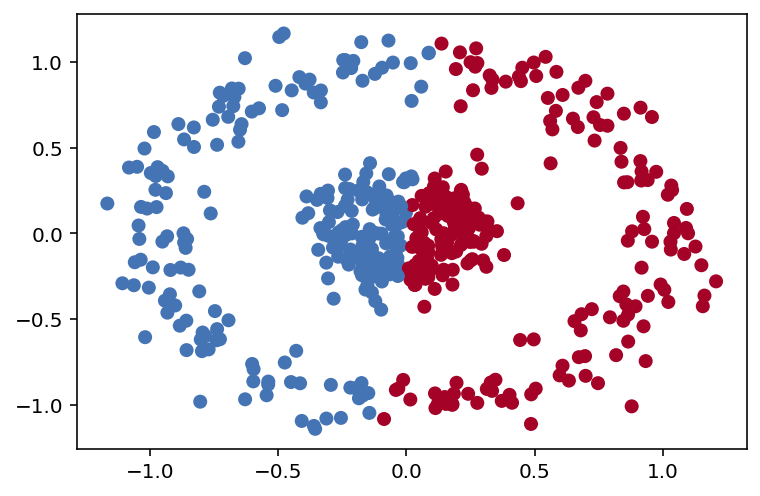

In [3]:
X, _ = make_circles(n_samples=500, noise=0.1, factor=.2)
centroids, labels = kmeans(X, 2, centroids='kmeans++')
colors=np.array(['#4574B4','#A40227'])
plt.scatter(X[:,0], X[:,1], c=colors[labels])
plt.show()

We need to generate a similarity matrix. Here we will use Breiman's Random forest using random forest classifier from sklearn.
</p> To generate a similarity matrix we need to follow these steps:</p>

1. Shuffle the samples and treat them as negative samples
2. Combine the original sample(taken as positive) and shuffled sample to train a random forest classifier. Be sure to keep high number of estimators and minimum leaf samples to get a good result.
3. Create a matrix by counting all the pairs that appear in the same leaf from the trained model.
4. Normalize the matrix by dividing the number of trees to get the similarity matrix.

Here I will use sklearn's built-in spectral clustering algorithm implementation by passing in the computed similarity matrix.

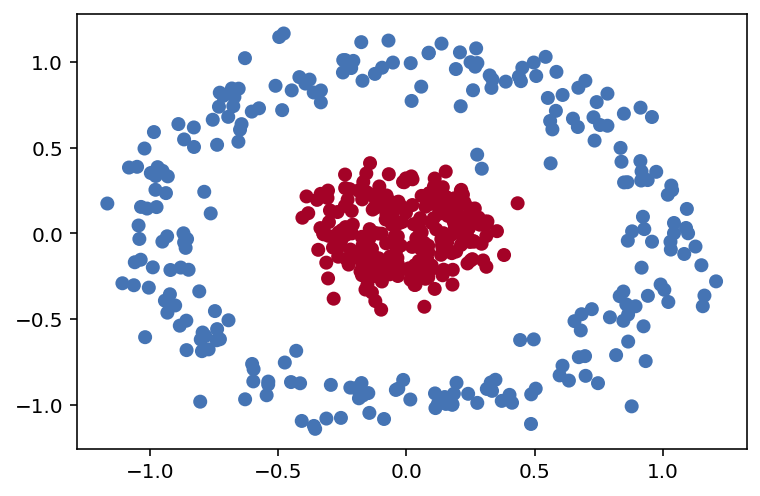

In [4]:
np.random.seed(5)
X_ = np.copy(X)
np.random.shuffle(X_)
X_train = np.append(X,X_,axis=0)
y_train = np.array([1]*500+[0]*500)

model = RandomForestClassifier(n_estimators=500, min_samples_leaf=40, random_state = 2)  
model.fit(X_train, y_train)
S = SimilarityMatrix(model, X)

cluster = SpectralClustering(n_clusters=2)
labels = cluster.fit_predict(S)  

colors=np.array(['#4574B4','#A40227'])
plt.scatter(X[:,0], X[:,1], c=colors[labels])
plt.show()

</p>As seen above the spectral clustering does a wonderful job in separating the clusters formed by the concentric circles which our kmeans algorithm failed to perform earlier.</p>

## 7. Summary
</p>To summarize we have discussed how kmeans algorithm works along with some limitations of kmeans and why we need kmeans++ initialization to improve the stability and performance.</p>
</p>Further, we discussed some of the applications of kmeans in classification, grouping and finding association in data, its application in image compression. We also found a limitation in kmeans as it cannot cluster data that is highly non-convex like concentric circles.</p>
</p>Finally we found a way to cluster non-convex data using spectral clustering by building a similarity matrix using Breiman's trick.</p>